In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# 标量的基本情况，变量名称、描述和类型
pd.read_excel("Data Dictionary.xls")

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

# 中文翻译
| 变量名称 | 描述 | 数据类型 |
|----------|------|----------|
| SeriousDlqin2yrs | 个人在过去两年内是否有90天以上的逾期记录 | 是/否 |
| RevolvingUtilizationOfUnsecuredLines | 信用卡和个人信用额度的总余额除以信用额度总和 | 百分比 |
| age | 借款人的年龄 | 整数 |
| NumberOfTime30-59DaysPastDueNotWorse | 借款人在过去两年内30-59天逾期但不超过的次数 | 整数 |
| DebtRatio | 每月债务支付、赡养费和生活费用除以每月总收入 | 百分比 |
| MonthlyIncome | 每月收入 | 实数 |
| NumberOfOpenCreditLinesAndLoans | 开放的贷款和信用额度的数量 | 整数 |
| NumberOfTimes90DaysLate | 借款人90天或以上逾期的次数 | 整数 |
| NumberRealEstateLoansOrLines | 抵押贷款和房地产贷款的数量，包括房屋净值信用额度 | 整数 |
| NumberOfTime60-89DaysPastDueNotWorse | 借款人在过去两年内60-89天逾期但不超过的次数 | 整数 |
| NumberOfDependents | 家庭中除借款人外的受抚养人数 | 整数 |


In [10]:
# 读取测试集合,去除掉第一个数据行
df = pd.read_csv("cs-training.csv").drop("Unnamed: 0", axis=1)

In [11]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

通过 info() 可以看出一共有150000条信息，MonthyIncome 和 NumberOfDependents 存在缺失的情况，MonthyIncome 缺失29731个数据，NumberOfDependents 缺失3924个数据。

下面使用 describe() 来看数据集中的计数、均值、最大最小值、标准差和第一、二、三个四分位值，同时增加了缺失率的计算

In [13]:
df.describe().T.assign(missing_rate = df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_rate
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0,0.000000
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0,0.000000
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0,0.000000
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0,0.000000
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0,0.198207
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0,0.000000
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0,0.000000
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0,0.000000


In [14]:
process_df=df.iloc[:, [5,0,1,2,3,4,6,7,8,9]]

In [15]:
process_df

,MonthlyIncome,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
0,9120.0,1,0.766127,45,2,0.802982,13,0,6,0
1,2600.0,0,0.957151,40,0,0.121876,4,0,0,0
2,3042.0,0,0.658180,38,1,0.085113,2,1,0,0
3,3300.0,0,0.233810,30,0,0.036050,5,0,0,0
4,63588.0,0,0.907239,49,1,0.024926,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...
149995,2100.0,0,0.040674,74,0,0.225131,4,0,1,0
149996,5584.0,0,0.299745,44,0,0.716562,4,0,1,0
149997,NaN,0,0.246044,58,0,3870.000000,18,0,1,0
149998,5716.0,0,0.000000,30,0,0.000000,4,0,0,0


### 缺失值处理：
    1、由于 MonthyIncome 缺失较多，因此不适合直接进行删除，这边根据变量之间存在的关系来填补缺失值，并采用随机森林的方法；
    
    2、NumberOfDependents 的缺失较少，对于整体的样本影响有限，因此这边直接进行删除操作，后续也可以进行一些其他的填补操作。

In [16]:
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df: pd.DataFrame):   
    # 把已有的数值型特征取出来
    process_df = df.iloc[:, [5,0,1,2,3,4,6,7,8,9]]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.MonthlyIncome.notnull()].values
    unknown = process_df[process_df.MonthlyIncome.isnull()].values
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.MonthlyIncome.isnull()), 'MonthlyIncome'] = predicted
    return df

In [17]:
df = set_missing(df)

预测值：  [8311. 1159. 8311. ... 1159. 2554. 2554.]


In [18]:
df = df.dropna() # 删除缺失值

In [19]:
df = df.drop_duplicates() # 删除重复值

### 异常值处理：
    异常值：偏离大多数抽样数据的数值，通常指测定值中与平均值的偏差超过两倍标准差的测定值
    
    通常采用离群值检测的方法对异常值进行检测

**RevolvingUtilizationOfUnsecuredLines**

<Axes: >

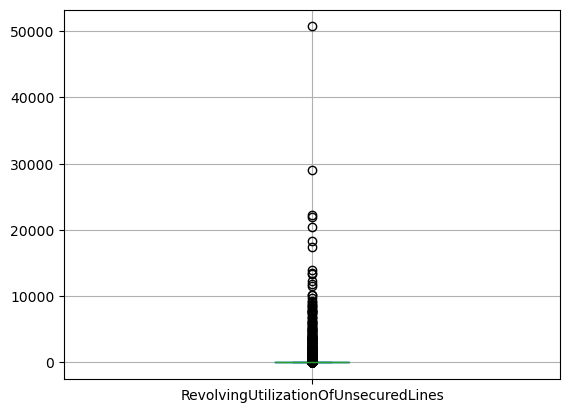

In [20]:
df["RevolvingUtilizationOfUnsecuredLines"].plot(kind="box", grid=True)

可以看出,绝大部分值都位于0-2的范围内

In [21]:
# 使用2来代替大于2的值
revNew = []
for val in df.RevolvingUtilizationOfUnsecuredLines:
    if val <= 2:
        revNew.append(val)
    else:
        revNew.append(2.)

In [22]:
df.RevolvingUtilizationOfUnsecuredLines = revNew

<Axes: >

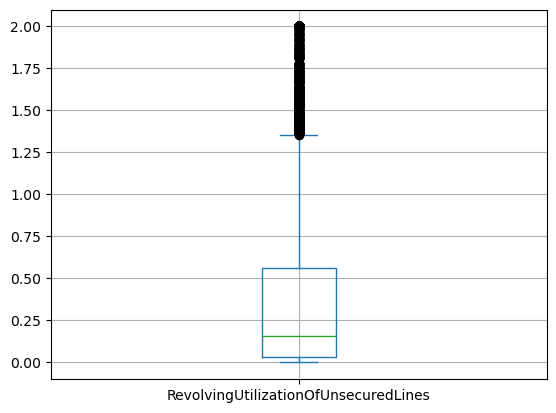

In [23]:
df["RevolvingUtilizationOfUnsecuredLines"].plot(kind="box",grid=True)

**age**

<Axes: >

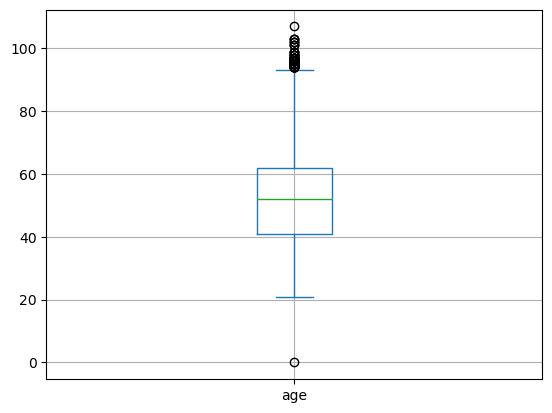

In [24]:
df.age.plot.box(grid=True)

In [25]:
df["age"] 

0         45
1         40
2         38
3         30
4         49
          ..
149995    74
149996    44
149997    58
149998    30
149999    64
Name: age, Length: 145563, dtype: int64

In [26]:
# 发现 age 属性中存在0值情况，而这些数据明显是异常值，因此对其进行处理
df = df[df["age"] > 0]

In [27]:
df['age']

0         45
1         40
2         38
3         30
4         49
          ..
149995    74
149996    44
149997    58
149998    30
149999    64
Name: age, Length: 145562, dtype: int64

**NumberOfTime30-59DaysPastDueNotWorse**

**NumberOfTime60-89DaysPastDueNotWorse**

**NumberOfTimes90DaysLate**

<Axes: >

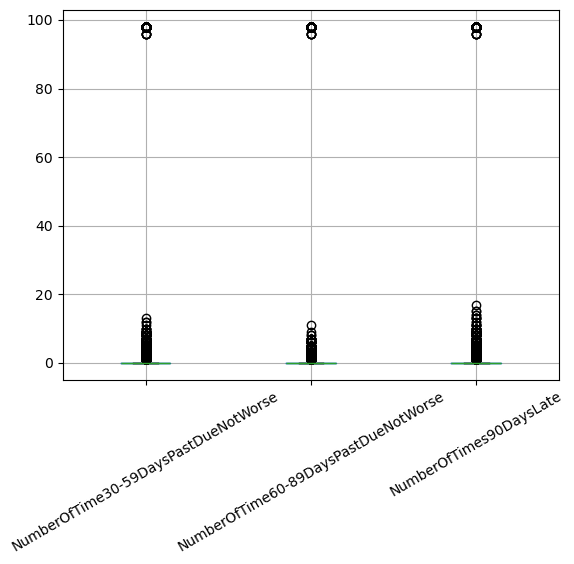

In [28]:
df.boxplot(column=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"], 
            rot=30)

上面的箱线图可以看出 NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate三个特征都存在两个异常值，下面使用 unique() 方法查看具体的异常值

In [29]:
print("NumberOfTime30-59DaysPastDueNotWorse:", df["NumberOfTime30-59DaysPastDueNotWorse"].unique())
print("NumberOfTime60-89DaysPastDueNotWorse:", df["NumberOfTime60-89DaysPastDueNotWorse"].unique())
print("NumberOfTimes90DaysLate:", df["NumberOfTimes90DaysLate"].unique())

NumberOfTime30-59DaysPastDueNotWorse: [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]
NumberOfTime60-89DaysPastDueNotWorse: [ 0  1  2  5  3 98  4  6  7  8 96 11  9]
NumberOfTimes90DaysLate: [ 0  1  3  2  5  4 98 10  9  6  7  8 15 96 11 13 14 17 12]


In [30]:
def replaceOutlier(data):
    New = []
    med = data.median()
    for val in data:
        if ((val == 98) | (val == 96)):
            New.append(med)
        else:
            New.append(val)
    return New

df["NumberOfTime30-59DaysPastDueNotWorse"] = replaceOutlier(df["NumberOfTime30-59DaysPastDueNotWorse"])
df["NumberOfTime60-89DaysPastDueNotWorse"] = replaceOutlier(df["NumberOfTime60-89DaysPastDueNotWorse"])
df["NumberOfTimes90DaysLate"] = replaceOutlier(df["NumberOfTimes90DaysLate"])

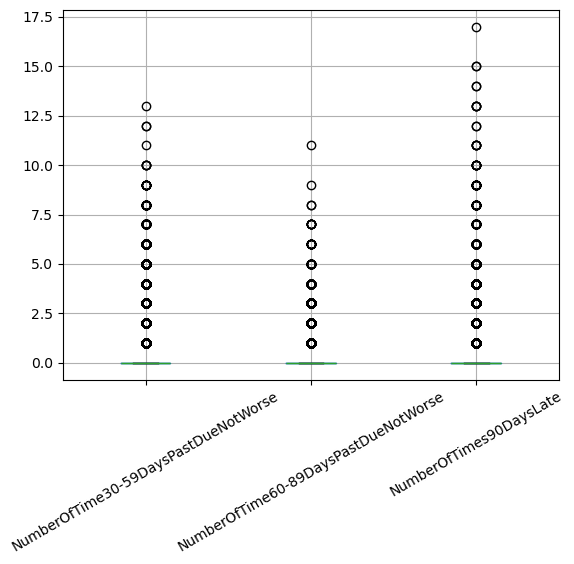

In [31]:
# 下图可以看出 NumberOfTime30-59DaysPastDueNotWorse 删除 98 和 96 两个异常值时，
# NumberOfTime60-89DaysPastDueNotWorse 和 NumberOfTimes90DaysLate 的两个异常值也同时删除了
df.boxplot(column=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"], 
            rot=30)
plt.show()

**DebtRatio**

<Axes: >

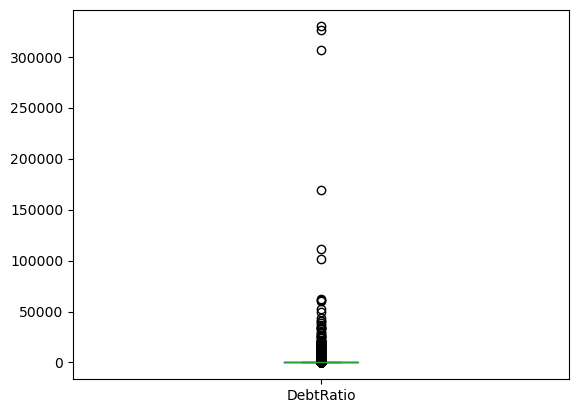

In [32]:
df["DebtRatio"].plot(kind="box")

In [33]:
# 使用中位数绝对偏差 MAD（median absolute deviation）方法进行异常值的检测
from scipy.stats import norm
# 
# def mad_based_outlier(points, thresh=3.5):
#     if type(points) is list:
#         points = np.asarray(points)
#     if len(points.shape) == 1:
#         points = points[:, None]
#     med = np.median(points, axis=0)
#     abs_dev = np.absolute(points - med)
#     med_abs_dev = np.median(abs_dev)
# 
#     mod_z_score = norm.ppf(0.75) * abs_dev / med_abs_dev
#     return mod_z_score > thresh
def mad_based_outlier(points, thresh=3.5):
    if isinstance(points, list):
        points = np.asarray(points)
    if len(points.shape) == 1:
        points = points[:, None]
    med = np.median(points, axis=0)
    abs_dev = np.absolute(points - med)
    med_abs_dev = np.median(abs_dev)

    mod_z_score = norm.ppf(0.75) * abs_dev / med_abs_dev
    return mod_z_score > thresh

In [34]:
# 检测出最小的异常值,用于替换异常值
# minUpperBound = min([val for (val, out) in zip(df.DebtRatio, mad_based_outlier(df.DebtRatio)) if out == True])
debt_ratios = df['DebtRatio'].values  # 先转换为 NumPy 数组
outliers = mad_based_outlier(debt_ratios)
minUpperBound = min([val for (val, out) in zip(debt_ratios, outliers) if out])

In [35]:
minUpperBound

1.566520924

In [36]:
newDebtRatio = []
for val in df.DebtRatio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

df.DebtRatio = newDebtRatio

In [37]:
df.DebtRatio.describe()

count    145562.000000
mean          0.571777
std           0.546250
min           0.000000
25%           0.173933
50%           0.359088
75%           0.770648
max           1.566521
Name: DebtRatio, dtype: float64

In [38]:
df.MonthlyIncome.describe()

count    1.455620e+05
mean     6.116310e+03
std      1.318226e+04
min      0.000000e+00
25%      2.554000e+03
50%      5.000000e+03
75%      8.166000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

<Axes: >

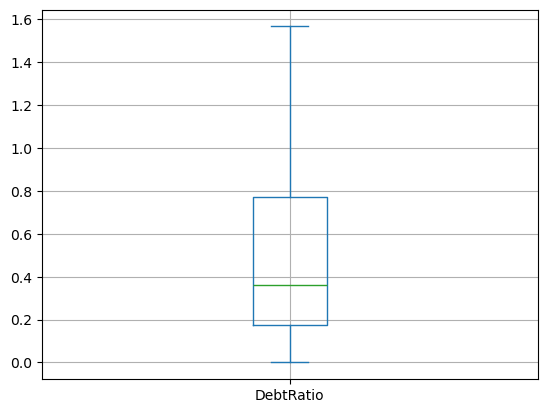

In [39]:
df["DebtRatio"].plot.box(grid=True)

**Monthly income**

<Axes: >

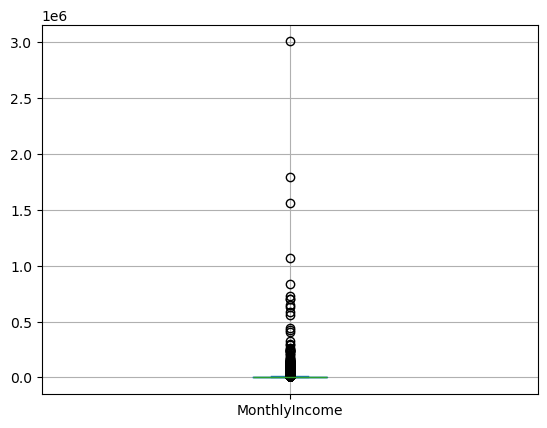

In [40]:
df.MonthlyIncome.plot.box(grid=True)

In [41]:
minUpperBound_MonthlyIncome = min([val for (val, out) in zip(df.MonthlyIncome, mad_based_outlier(df.MonthlyIncome.values)) if out == True])

In [42]:
newMonthlyIncome = []
for val in df.MonthlyIncome:
    if val > minUpperBound_MonthlyIncome:
        newMonthlyIncome.append(minUpperBound_MonthlyIncome)
    else:
        newMonthlyIncome.append(val)

df.MonthlyIncome = newMonthlyIncome

<Axes: >

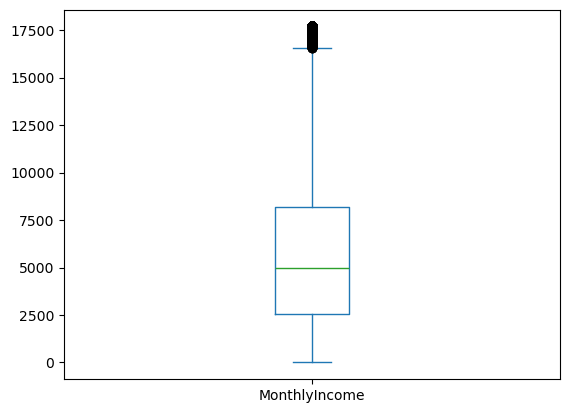

In [43]:
df.MonthlyIncome.plot.box()

**NumberOfOpenCreditLinesAndLoans**

<Axes: >

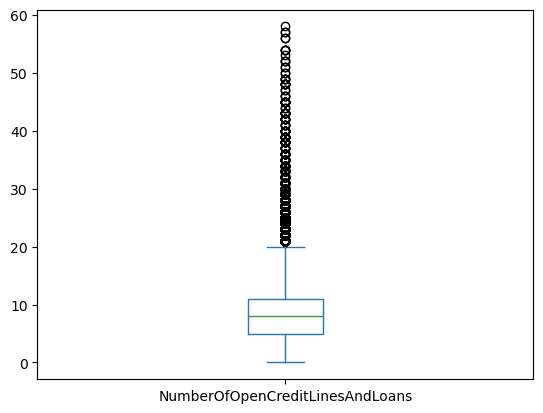

In [44]:
df["NumberOfOpenCreditLinesAndLoans"].plot(kind="box")

In [45]:
minUpperBound_NumberOfOpenCreditLinesAndLoans = min([val for (val, out) in zip(df.NumberOfOpenCreditLinesAndLoans, mad_based_outlier(df.NumberOfOpenCreditLinesAndLoans.values)) if out == True])

In [46]:
newNumberOfOpenCreditLinesAndLoans = []
for val in df.NumberOfOpenCreditLinesAndLoans:
    if val > minUpperBound_NumberOfOpenCreditLinesAndLoans:
        newNumberOfOpenCreditLinesAndLoans.append(minUpperBound_NumberOfOpenCreditLinesAndLoans)
    else:
        newNumberOfOpenCreditLinesAndLoans.append(val)

df.NumberOfOpenCreditLinesAndLoans = newNumberOfOpenCreditLinesAndLoans

In [47]:
df.NumberOfOpenCreditLinesAndLoans.describe()

count    145562.000000
mean          8.503689
std           4.936663
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          24.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

<Axes: >

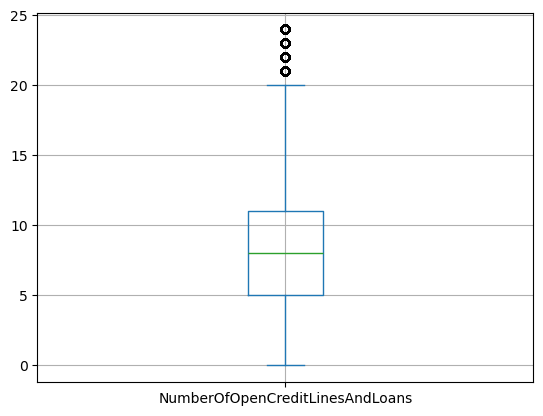

In [48]:
df["NumberOfOpenCreditLinesAndLoans"].plot(kind="box", grid=True)

**NumberRealEstateLoansOrLines**

<Axes: >

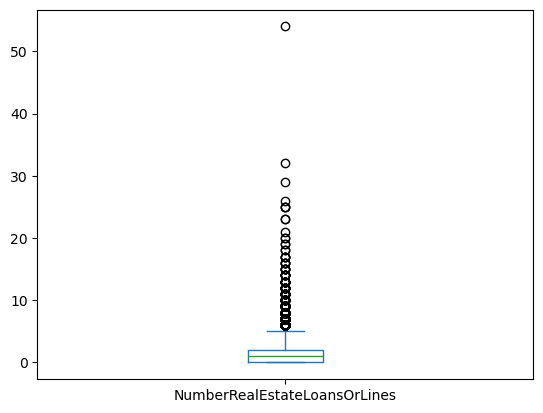

In [49]:
df["NumberRealEstateLoansOrLines"].plot(kind="box")

In [50]:
realNew = []
for val in df.NumberRealEstateLoansOrLines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)

df.NumberRealEstateLoansOrLines = realNew

<Axes: >

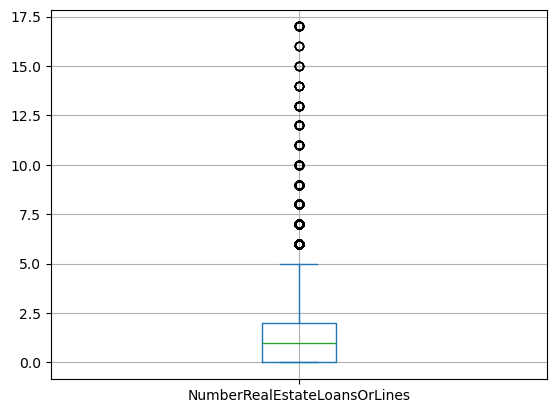

In [51]:
df["NumberRealEstateLoansOrLines"].plot(kind="box", grid=True)

<Axes: >

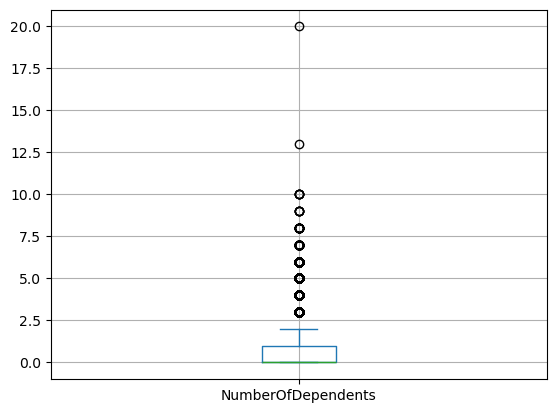

In [52]:
df.NumberOfDependents.plot.box(grid=True)

In [53]:
depNew = []
for var in df.NumberOfDependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

df.NumberOfDependents = depNew

<Axes: >

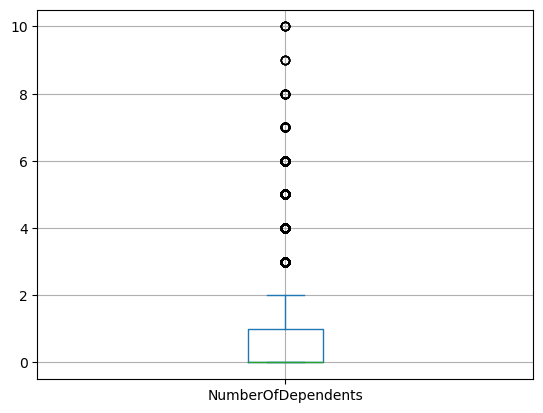

In [54]:
df.NumberOfDependents.plot.box(grid=True)

### 数据切分
    将数据进行切分，分成训练集和测试集两部分

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
Y = df["SeriousDlqin2yrs"]
X = df.iloc[:, 1:]
# 测试和训练数据进行3：7的比例进行切分 random_state定一个值是的每次运行的时候不会被随机分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

train = pd.concat([Y_train, X_train], axis=1)
test = pd.concat([Y_test, X_test], axis=1)

train.to_csv('cs-TrainData.csv',index=False)
test.to_csv('cs-TestData.csv',index=False)

### 探索性数据分析
    一般采用直方图、散点图和箱线图等来进行分析

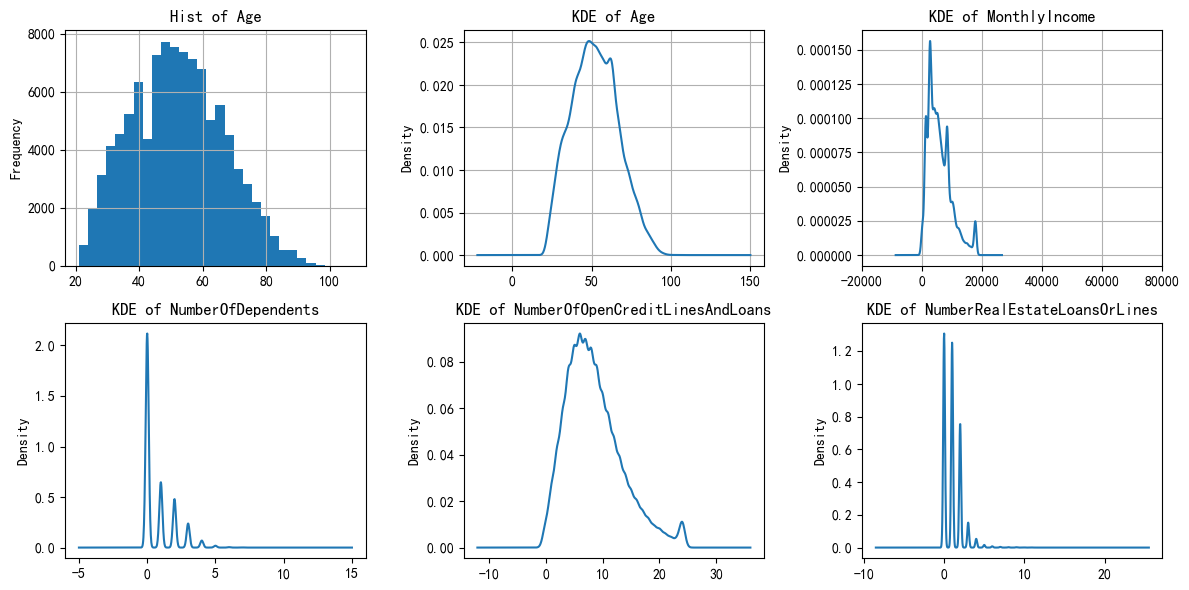

In [57]:
# 下面利用直方图和核密度估计画图，Age、MonthlyIncome、NumberOfOpenCreditLinesAndLoans大致呈正太分布，符合统计分析

fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2, 3), (0, 0))
train["age"].plot(kind="hist", bins=30, figsize=(12, 6), grid=True)
plt.title("Hist of Age")

plt.subplot2grid((2, 3), (0, 1))
train["age"].plot(kind="kde", grid=True)
plt.title("KDE of Age")

plt.subplot2grid((2, 3), (0, 2))
train["MonthlyIncome"].plot(kind="kde", grid=True)
plt.xlim(-20000, 80000)
plt.title("KDE of MonthlyIncome")

plt.subplot2grid((2, 3), (1, 0))
train["NumberOfDependents"].plot(kind="kde")
plt.title("KDE of NumberOfDependents")

plt.subplot2grid((2, 3), (1, 1))
train["NumberOfOpenCreditLinesAndLoans"].plot(kind="kde")
plt.title("KDE of NumberOfOpenCreditLinesAndLoans")

plt.subplot2grid((2, 3), (1, 2))
train["NumberRealEstateLoansOrLines"].plot(kind="kde")
plt.title("KDE of NumberRealEstateLoansOrLines")

# 解决中文的显示问题
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

plt.tight_layout() # 调整子图之间的间距，紧凑显示图像
plt.show()

### 特征选择
    变量分箱：
    
        将连续变量离散化
           
        将多状态的离散变量合并成少状态
              
    变量分箱的重要性：
    
        1、稳定性：避免特征中无意义的波动对评分带来波动
        
        2、健壮性：避免极端值的影响
        
     变量分箱的优势：
     
         1、可以将缺失值作为一个独立的箱带入模型中
         
         2、将所有的变量变换到相似的尺度上
         
     变量分箱的劣势：
     
         1、计算量大
         
         2、分箱之后需要编码
      
     变量分箱常用的方法：
     
         有监督的：
            
            1、Best-KS； 2、ChiMerge（卡方分箱法）
        
         无监督的：
            
            1、等距； 2、等频； 3、聚类

In [58]:
import scipy.stats as stats

# 自定义自动分箱函数
def mono_bin(Y, X, n=20):
    r = 0
    good = Y.sum()
    bad = Y.count() - good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X.rank(method="first"), n)}) # X.rank(method="first")
        d2 = d1.groupby("Bucket", as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y) # 使用斯皮尔曼等级相关系数来评估两个变量之间的相关性
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1-d3['rate'])) / (good/bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    cut=[]
    cut.append(float('-inf'))
    for i in range(1, n+1):
        qua = X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4, iv, cut, woe

In [59]:
# 自定义分箱函数
def self_bin(Y, X, cat):
    good = Y.sum()
    bad = Y.count() - good
    d1 = pd.DataFrame({'X': X, 'Y': Y,'Bucket': pd.cut(X, cat)})
    d2 = d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    woe = list(d4['woe'].round(3))
    return d4, iv, woe

In [60]:
dfx1, ivx1, cutx1, woex1 = mono_bin(train.SeriousDlqin2yrs, train.RevolvingUtilizationOfUnsecuredLines, n=10)

                          min       max   sum  total      rate       woe  \
Bucket                                                                     
(0.999, 25474.0]     0.000000  0.031258   464  25474  0.018215 -1.370448   
(25474.0, 50947.0]   0.031260  0.158295   542  25473  0.021277 -1.211902   
(50947.0, 76420.0]   0.158306  0.560505  1323  25473  0.051937 -0.287684   
(76420.0, 101893.0]  0.560523  2.000000  4607  25473  0.180858  1.106155   

                     goodattribute  badattribute  
Bucket                                            
(0.999, 25474.0]          0.066897      0.263382  
(25474.0, 50947.0]        0.078143      0.262550  
(50947.0, 76420.0]        0.190744      0.254326  
(76420.0, 101893.0]       0.664216      0.219742  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default 

In [61]:
pd.cut(train.RevolvingUtilizationOfUnsecuredLines,10)

61003     (-0.002, 0.2]
26974     (-0.002, 0.2]
64962     (-0.002, 0.2]
22271        (0.8, 1.0]
21614        (0.8, 1.0]
              ...      
133033       (0.2, 0.4]
123509    (-0.002, 0.2]
18246     (-0.002, 0.2]
28850        (1.6, 1.8]
16172     (-0.002, 0.2]
Name: RevolvingUtilizationOfUnsecuredLines, Length: 101893, dtype: category
Categories (10, interval[float64, right]): [(-0.002, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] ... (1.2, 1.4] < (1.4, 1.6] < (1.6, 1.8] < (1.8, 2.0]]

In [62]:
print(X)

        RevolvingUtilizationOfUnsecuredLines  age  \
0                                   0.766127   45   
1                                   0.957151   40   
2                                   0.658180   38   
3                                   0.233810   30   
4                                   0.907239   49   
...                                      ...  ...   
149995                              0.040674   74   
149996                              0.299745   44   
149997                              0.246044   58   
149998                              0.000000   30   
149999                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                        2.0   0.802982         9120.0   
1                                        0.0   0.121876         2600.0   
2                                        1.0   0.085113         3042.0   
3                                        0.0   0.036050         330

In [63]:
# d1 = pd.DataFrame({"X": train.RevolvingUtilizationOfUnsecuredLines, "Y": train.SeriousDlqin2yrs, "Bucket": pd.qcut(X.rank(method="first"), 10)}) 


In [64]:
# pd.qcut(X.rank(method="first"), 10)

In [65]:
dfx2, ivx2, cutx2, woex2 = mono_bin(train.SeriousDlqin2yrs, train.age, n=10)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)


                        min  max   sum  total      rate       woe  \
Bucket                                                              
(0.999, 11322.333]       21   33  1317  11322  0.116322  0.588970   
(11322.333, 22643.667]   33   40  1078  11321  0.095221  0.365212   
(22643.667, 33965.0]     40   45   984  11321  0.086918  0.264840   
(33965.0, 45286.333]     45   49   934  11322  0.082494  0.207769   
(45286.333, 56607.667]   49   54   839  11321  0.074110  0.091495   
(56607.667, 67929.0]     54   59   667  11321  0.058917 -0.154202   
(67929.0, 79250.333]     59   63   511  11322  0.045133 -0.435251   
(79250.333, 90571.667]   63   71   331  11321  0.029238 -0.885924   
(90571.667, 101893.0]    71  107   275  11322  0.024289 -1.076444   

                        goodattribute  badattribute  
Bucket                                               
(0.999, 11322.333]           0.189879      0.105363  
(11322.333, 22643.667]       0.155421      0.107870  
(22643.667, 33965.0]    

In [66]:
pinf = float('inf') # 正无穷大
ninf = float('-inf') # 负无穷大

In [67]:
cutx3 = [ninf, 0, 1, 3, 5, pinf]
dfx3, ivx3, woex3 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTime30-59DaysPastDueNotWorse"], cutx3)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  3571  85522  0.041755 -0.516577       0.514850   
(0.0, 1.0]   1.0   1.0  1694  11086  0.152805  0.903933       0.244233   
(1.0, 3.0]   2.0   3.0  1268   4383  0.289300  1.717911       0.182814   
(3.0, 5.0]   4.0   5.0   324    744  0.435484  2.357188       0.046713   
(5.0, inf]   6.0  13.0    79    158  0.500000  2.616699       0.011390   

             badattribute  
Bucket                     
(-inf, 0.0]      0.863033  
(0.0, 1.0]       0.098908  
(1.0, 3.0]       0.032804  
(3.0, 5.0]       0.004423  
(5.0, inf]       0.000832  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)


In [68]:
df.DebtRatio.describe()

count    145562.000000
mean          0.571777
std           0.546250
min           0.000000
25%           0.173933
50%           0.359088
75%           0.770648
max           1.566521
Name: DebtRatio, dtype: float64

In [69]:
dfx4, ivx4, cutx4, woex4 = mono_bin(train.SeriousDlqin2yrs, train.DebtRatio, n=20)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default 

                          min       max   sum  total      rate       woe  \
Bucket                                                                     
(0.999, 33965.0]     0.000000  0.235769  2074  33964  0.061065 -0.116114   
(33965.0, 67929.0]   0.235771  0.544309  2155  33964  0.063450 -0.075260   
(67929.0, 101893.0]  0.544337  1.566521  2707  33965  0.079700  0.170265   

                     goodattribute  badattribute  
Bucket                                            
(0.999, 33965.0]          0.299020      0.335836  
(33965.0, 67929.0]        0.310698      0.334983  
(67929.0, 101893.0]       0.390283      0.329181  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default 

In [70]:
dfx5, ivx5, cutx5, woex5 = mono_bin(train.SeriousDlqin2yrs, train.MonthlyIncome, n=10)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default 

                        min      max   sum  total      rate       woe  \
Bucket                                                                  
(0.999, 33965.0]        0.0   3400.0  2747  33964  0.080880  0.186246   
(33965.0, 67929.0]   3400.0   6844.0  2553  33964  0.075168  0.106810   
(67929.0, 101893.0]  6845.0  17694.0  1636  33965  0.048167 -0.367012   

                     goodattribute  badattribute  
Bucket                                            
(0.999, 33965.0]          0.396050      0.328749  
(33965.0, 67929.0]        0.368080      0.330792  
(67929.0, 101893.0]       0.235871      0.340459  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\1426384454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby("Bucket", as_index = True)


In [71]:
cutx6 = [ninf, 1, 2, 3, 5, pinf]
dfx6, ivx6, woex6 = self_bin(train.SeriousDlqin2yrs, train.NumberOfOpenCreditLinesAndLoans, cutx6)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)


             min  max   sum  total      rate       woe  goodattribute  \
Bucket                                                                  
(-inf, 1.0]    0    1   714   3827  0.186569  1.144240       0.102941   
(1.0, 2.0]     2    2   410   4343  0.094405  0.355698       0.059112   
(2.0, 3.0]     3    3   464   5970  0.077722  0.142990       0.066897   
(3.0, 5.0]     4    5  1111  16589  0.066972 -0.017460       0.160179   
(5.0, inf]     6   24  4237  71164  0.059539 -0.143048       0.610871   

             badattribute  
Bucket                     
(-inf, 1.0]      0.032783  
(1.0, 2.0]       0.041419  
(2.0, 3.0]       0.057984  
(3.0, 5.0]       0.163000  
(5.0, inf]       0.704814  


In [72]:
cutx7 = [ninf, 0, 1, 3, pinf]
dfx7, ivx7, woex7 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTimes90DaysLate"], cutx7)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  4656  96308  0.048345 -0.363143       0.671280   
(0.0, 1.0]   1.0   1.0  1206   3608  0.334257  1.927706       0.173875   
(1.0, 3.0]   2.0   3.0   785   1542  0.509079  2.653019       0.113178   
(3.0, inf]   4.0  15.0   289    435  0.664368  3.299519       0.041667   

             badattribute  
Bucket                     
(-inf, 0.0]      0.965195  
(0.0, 1.0]       0.025296  
(1.0, 3.0]       0.007972  
(3.0, inf]       0.001538  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)


In [73]:
cutx8 = [ninf, 0, 1, 2, 3, pinf]
dfx8, ivx8, woex8 = self_bin(train.SeriousDlqin2yrs, train["NumberRealEstateLoansOrLines"], cutx8)

             min  max   sum  total      rate       woe  goodattribute  \
Bucket                                                                  
(-inf, 0.0]    0    0  3226  37444  0.086155  0.255190       0.465110   
(0.0, 1.0]     1    1  1863  35769  0.052084 -0.284705       0.268599   
(1.0, 2.0]     2    2  1254  21766  0.057613 -0.177973       0.180796   
(2.0, 3.0]     3    3   293   4356  0.067264 -0.012805       0.042243   
(3.0, inf]     4   17   300   2558  0.117279  0.598247       0.043253   

             badattribute  
Bucket                     
(-inf, 0.0]      0.360353  
(0.0, 1.0]       0.357067  
(1.0, 2.0]       0.216014  
(2.0, 3.0]       0.042788  
(3.0, inf]       0.023779  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)


In [74]:
cutx9 = [ninf, 0, 1, 3, pinf]
dfx9, ivx9, woex9 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTime60-89DaysPastDueNotWorse"], cutx9)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  5107  96788  0.052765 -0.271004       0.736303   
(0.0, 1.0]   1.0   1.0  1243   4000  0.310750  1.820084       0.179210   
(1.0, 3.0]   2.0   3.0   517    994  0.520121  2.697225       0.074539   
(3.0, inf]   4.0  11.0    69    111  0.621622  3.113136       0.009948   

             badattribute  
Bucket                     
(-inf, 0.0]      0.965500  
(0.0, 1.0]       0.029034  
(1.0, 3.0]       0.005023  
(3.0, inf]       0.000442  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)


In [75]:
cutx10 = [ninf, 0, 1, 2, pinf]
dfx10, ivx10, woex10 = self_bin(train.SeriousDlqin2yrs, train["NumberOfDependents"], cutx10)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  3579  60340  0.059314 -0.147067       0.516003   
(0.0, 1.0]   1.0   1.0  1344  18421  0.072960  0.074617       0.193772   
(1.0, 2.0]   2.0   2.0  1125  13668  0.082309  0.205319       0.162197   
(2.0, inf]   3.0  10.0   888   9464  0.093829  0.348948       0.128028   

             badattribute  
Bucket                     
(-inf, 0.0]      0.597755  
(0.0, 1.0]       0.179839  
(1.0, 2.0]       0.132091  
(2.0, inf]       0.090315  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18692\3233258545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index = True)


### 相关性分析和IV筛选

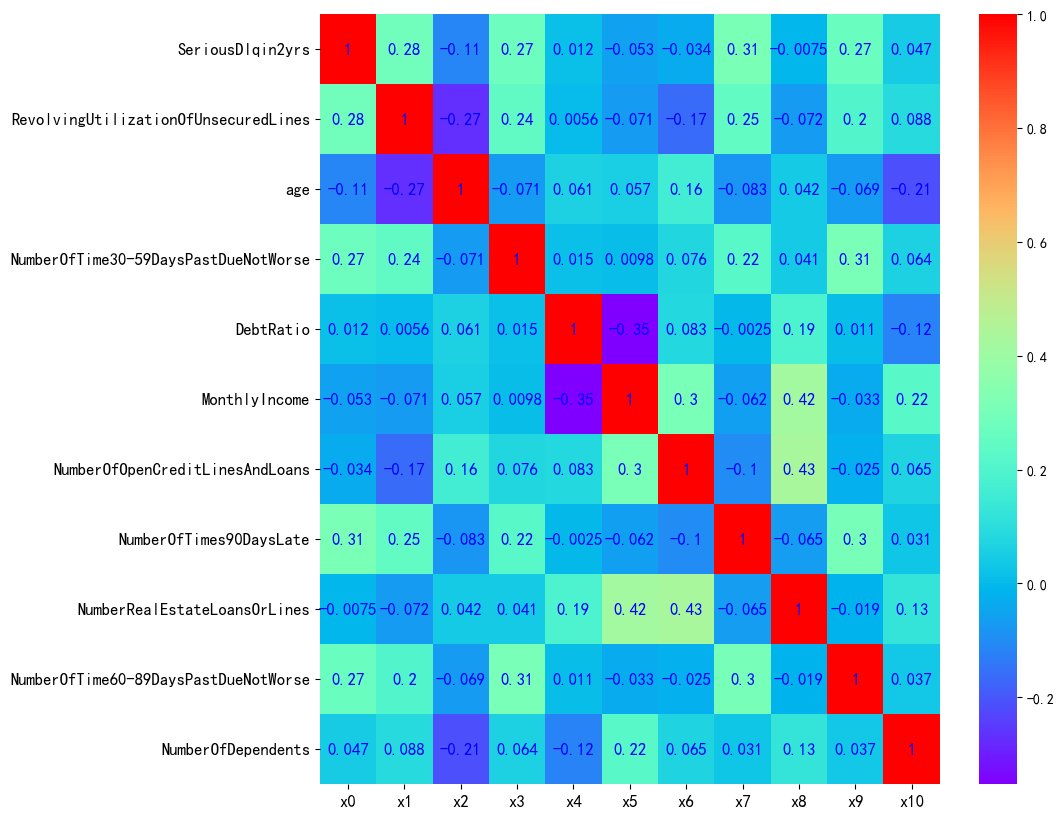

In [76]:
corr = train.corr() # 计算各变量的相关性系数
xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'] # x轴标签
yticks = list(corr.index) # y轴标签
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='rainbow', ax=ax,
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'blue'}) # 绘制相关性系数热力图
ax.set_xticklabels(xticks, rotation=0, fontsize=12)
ax.set_yticklabels(yticks, rotation=0, fontsize=12)
plt.show()

### 上图可以看出变量之间的相关性都较小，但是 NumberOfOpenCreditLinesAndLoans 和 NumberRealEstateLoansOrLines 相对来说较大为0.43

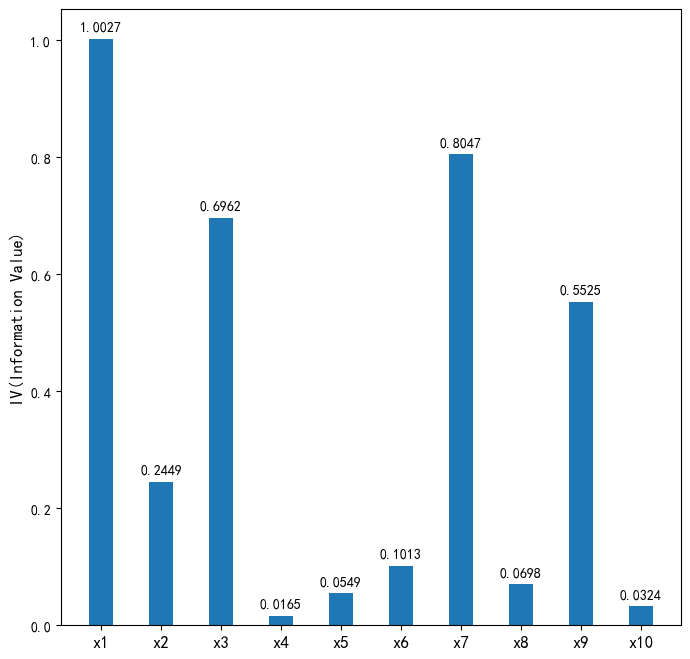

In [77]:
ivlist = [ivx1, ivx2, ivx3, ivx4, ivx5, ivx6, ivx7, ivx8, ivx9, ivx10] # 各变量IV
index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'] # x轴的标签
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index)) + 1
ax1.bar(x, ivlist, width=0.4) # 生成柱状图
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=12)
# 在柱状图上添加数字标签
for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

通过IV值判断变量预测能力的标准是：

**< 0.02: unpredictive**

**0.02 to 0.1: weak**

**0.1 to 0.3: medium**

**0.3 to 0.5: strong**

**> 0.5: suspicious**

DebtRatio、MonthlyIncome、NumberRealEstateLoansOrLines 和 NumberOfDependents 变量的IV值明显较低

### 模型分析
    WOE转换:
        证据权重（Weight of Evidence,WOE）转换可以将Logistic回归模型转变为标准评分卡格式

In [78]:
# 替换成woe函数
def replace_woe(series, cut, woe):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut)-2
        m = len(cut)-2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

In [79]:
from pandas import Series
train = pd.read_csv("cs-TrainData.csv")
train['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(train['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
train['age'] = Series(replace_woe(train['age'], cutx2, woex2))
train['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(train['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
train['DebtRatio'] = Series(replace_woe(train['DebtRatio'], cutx4, woex4))
train['MonthlyIncome'] = Series(replace_woe(train['MonthlyIncome'], cutx5, woex5))
train['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(train['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
train['NumberOfTimes90DaysLate'] = Series(replace_woe(train['NumberOfTimes90DaysLate'], cutx7, woex7))
train['NumberRealEstateLoansOrLines'] = Series(replace_woe(train['NumberRealEstateLoansOrLines'], cutx8, woex8))
train['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(train['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
train['NumberOfDependents'] = Series(replace_woe(train['NumberOfDependents'], cutx10, woex10))
train.to_csv('cs-Woetrain.csv', index=False)

In [80]:
test = pd.read_csv('cs-TestData.csv')
# 替换成woe
test['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(test['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
test['age'] = Series(replace_woe(test['age'], cutx2, woex2))
test['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
test['DebtRatio'] = Series(replace_woe(test['DebtRatio'], cutx4, woex4))
test['MonthlyIncome'] = Series(replace_woe(test['MonthlyIncome'], cutx5, woex5))
test['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(test['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
test['NumberOfTimes90DaysLate'] = Series(replace_woe(test['NumberOfTimes90DaysLate'], cutx7, woex7))
test['NumberRealEstateLoansOrLines'] = Series(replace_woe(test['NumberRealEstateLoansOrLines'], cutx8, woex8))
test['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
test['NumberOfDependents'] = Series(replace_woe(test['NumberOfDependents'], cutx10, woex10))
test.to_csv('cs-TestWoeData.csv', index=False)

### 模型预测

In [81]:
from sklearn.model_selection import cross_val_score

def cvDictGen(functions, scr, X_train, Y_train, cv=10, verbose=1):
    cvDict = {}
    for func in functions:
        try:
            # 确保在使用分类得分，而非基于概率的roc_auc
            cvScore = cross_val_score(func, X_train, Y_train, cv=cv, verbose=verbose, scoring=scr)
            cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
        except Exception as e:
            print(f"Error with model {str(func).split('(')[0]}: {e}")
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[list(cvDict.keys())[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[list(cvDict.keys())[0]][1]))]
    return cvDictNormalized

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=3,
                             metric='minkowski', metric_params=None)

In [84]:
lrMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight="balanced", random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [85]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
gbMod = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [ ]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=20, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)

In [ ]:
print(X_train.isnull().sum())
print(Y_train.isnull().sum())
print(X_train.nunique())
print(Y_train.value_counts())
print(set(Y_train))

In [ ]:
cvD = cvDictGen(functions=[knMod, lrMod, adaMod, gbMod, rfMod], scr='roc_auc', X_train=X_train, Y_train=Y_train)

In [ ]:
cvD # 采用auc

# 采用accuracy评分标准
{'KNeighborsClassifier': [0.9284445366286702, 0.0010733279828027222],
 'LogisticRegression': [0.8017234416726999, 0.0035193294166788306],
 'AdaBoostClassifier': [0.9344213828706149, 0.002211681954126096],
 'GradientBoostingClassifier': [0.9353341165032889, 0.0022466087863914973],
 'RandomForestClassifier': [0.9294357535609368, 0.0009804186898620534]}

In [ ]:
# 不论何种评分,排序均相同

In [ ]:
cvDictNormalize(cvD)

AdaBoost 、 GB 、 LR的out-of-the-bag较好

### 最优化超参数

AdaBoost模型

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
ada_param = {'n_estimators': [10,50,100,200,400],
                 'learning_rate': [0.1, 0.05]}

In [ ]:
randomizedSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=ada_param, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, Y_train)

In [ ]:
randomizedSearchAda.best_params_, randomizedSearchAda.best_score_

GB模型

In [ ]:
gbParams = {'loss' : ['log_loss', 'exponential'],
            'n_estimators': [50,100,150,200],
            'max_depth': [1,2,3,4,5],
            'learning_rate':[0.1, 0.05,0.2]}

In [ ]:
randomizedSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, Y_train)


### 1. **训练时间的差异**
- 训练不同参数组合的模型所花费的时间有较大差异。比如，`n_estimators=200` 和 `max_depth=3` 的组合耗时大约 28.7 秒，而较低 `n_estimators` 的组合耗时更短，像 `n_estimators=50` 时耗时约 9.5 秒。
- 对于 `max_depth=1` 和 `n_estimators=100` 的组合，训练时间显著缩短到 5 秒。
- 训练时间主要受 `max_depth` 和 `n_estimators` 影响，较深的树和较大的 `n_estimators` 都会增加模型训练时间。


### 2. **学习率的影响**
- 你尝试了 `learning_rate=0.2` 和 `learning_rate=0.1` 以及 `learning_rate=0.05`。根据学习率不同，训练时间没有显著差异，这说明对于你的数据集，学习率主要影响的是模型的更新速率，而非训练速度。

**建议：**
- 当前 `learning_rate=0.1` 和 `0.2` 表现不错，`0.05` 也有尝试，但可能对模型的收敛速度会有一定影响。可以根据交叉验证的结果判断，适当选择较为合适的学习率。

### 3. **模型类型的选择**
- 使用了不同的 `loss` 函数组合：`log_loss` 和 `exponential`。不同的损失函数的组合对模型的性能可能会有不同的影响。

**建议：**
- 根据最终结果，可以选择表现较好的损失函数并在该基础上进行进一步的参数微调。

### 4. **训练过程中的超参数值范围**
- 使用了 `n_estimators` 从 50 到 200，`max_depth` 从 1 到 4。可以看到较大的 `n_estimators`（如 150 和 200）和适中的 `max_depth`（如 3 或 4）花费的时间都较长，但这是在较深模型下的预期表现。
  
- 如果需要更快的训练过程，可以考虑：
  - 将 `max_depth` 限制在较小范围内，例如 1 到 3。
  - `n_estimators` 限制在 100~200 的范围内，这样可能足以取得不错的结果，同时不会大幅增加训练时间。

### 5. **交叉验证折数（CV）的影响**
- 输出表明使用了 5 折交叉验证（CV=5），每个参数组合都经过了多次交叉验证。这会在一定程度上延长训练时间。

**建议：**
- 如果训练时间过长，可以在调参阶段使用 3 折交叉验证（CV=3）来节省计算资源，然后在最终的模型确定阶段使用 5 折或更多折数进行评估。

### 6. **进一步的优化建议**
- `max_depth=3` 和 `learning_rate=0.2` 看起来是一个合适的参数组合。可以进一步结合模型性能（如 AUC 或其他评分）来确定是否需要微调 `n_estimators` 或其他超参数。
- 同时也可以考虑是否需要增加 `subsample` 和 `min_samples_split` 等超参数的调优，以防止模型过拟合。

### 7. **下一步操作**
- 查看 `randomizedSearchGB.best_params_` 和 `randomizedSearchGB.best_score_`，根据输出的最佳参数确定接下来的调整方向。
- 根据当前运行时间和模型表现，在最终模型训练时考虑资源分配，如是否增加计算资源或优化训练流程。

In [ ]:
randomizedSearchGB.best_params_, randomizedSearchGB.best_score_

In [ ]:
bestGbModFitted = randomizedSearchGB.best_estimator_.fit(X_train, Y_train)

In [ ]:
bestAdaModFitted = randomizedSearchAda.best_estimator_.fit(X_train, Y_train)

In [ ]:
cvDictHPO = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc',X_train=X_train, Y_train=Y_train)

In [ ]:
cvDictNormalize(cvDictHPO)

In [ ]:
# def plotCvRocCurve(X, y, classifier, nsplits=5):
# 
#     from sklearn.metrics import roc_curve, auc
#     from sklearn.model_selection import StratifiedKFold
#     import matplotlib.pyplot as plt
#     from scipy import interp
# 
#     cv = StratifiedKFold(n_splits=nsplits)
# 
#     mean_tpr = 0.0
#     mean_fpr = np.linspace(0, 1, 100)
#     all_tpr = []
# 
#     for i, (train, test) in enumerate(cv):
#         probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
# 
#         fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
#         mean_tpr += interp(mean_fpr, fpr, tpr)
#         mean_tpr[0] = 0.0
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
# 
#     plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# 
#     mean_tpr /= len(cv)
#     mean_tpr[-1] = 1.0
#     mean_auc = auc(mean_fpr, mean_tpr)
#     plt.plot(mean_fpr, mean_tpr, 'k--',
#              label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
# 
#     plt.xlim([-0.05, 1.05])
#     plt.ylim([-0.05, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('CV ROC curve')
#     plt.legend(loc="lower right")
#     fig = plt.gcf()
#     fig.set_size_inches(15,5)
# 
#     plt.show()
# 
# def rocZeroOne(y_true, y_predicted_porba):
# 
#     from sklearn.metrics import roc_curve
#     from scipy.spatial.distance import euclidean
# 
#     fpr, tpr, thresholds = roc_curve(y_true, y_predicted_porba[:, 1])
# 
#     best = [0, 1]
#     dist = []
#     for (x, y) in zip(fpr, tpr):
#         dist.append([euclidean([x,y], best)])
# 
#     bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]]
# 
#     bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
#     bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
# 
#     print('\n' + 'ROC曲线最佳点位置: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100))
#     print('\n' + '最佳截止点: {:0.4f}'.format(bestCutOff1))
# 
#     plt.plot(dist)
#     plt.xlabel('Index')
#     plt.ylabel('Euclidean Distance to the perfect [0,1]')
#     fig = plt.gcf()
#     fig.set_size_inches(15,5)
def plotCvRocCurve(X, y, classifier, nsplits=5):
    
    from sklearn.metrics import roc_curve, auc
    from sklearn.model_selection import StratifiedKFold
    import matplotlib.pyplot as plt
    from scipy import interp
    import numpy as np

    cv = StratifiedKFold(n_splits=nsplits)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv.split(X, y)):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])

        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= nsplits
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CV ROC curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(15,5)

    plt.show()

def rocZeroOne(y_true, y_predicted_proba):
    
    from sklearn.metrics import roc_curve
    from scipy.spatial.distance import euclidean
    import matplotlib.pyplot as plt

    fpr, tpr, thresholds = roc_curve(y_true, y_predicted_proba[:, 1])
    
    best = [0, 1]
    dist = []
    for (x, y) in zip(fpr, tpr):
        dist.append(euclidean([x, y], best))

    bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]]
    
    bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
    bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
    
    print('\n' + 'ROC曲线最佳点位置: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100))
    print('\n' + '最佳截止点: {:0.4f}'.format(bestCutOff1))

    plt.plot(dist)
    plt.xlabel('Index')
    plt.ylabel('Euclidean Distance to the perfect [0,1]')
    fig = plt.gcf()
    fig.set_size_inches(15,5)
    plt.show()


In [ ]:
plotCvRocCurve(X, Y, randomizedSearchGB.best_estimator_)

In [ ]:
rocZeroOne(Y_test, randomizedSearchGB.predict_proba(X_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

# 定义模型和参数网格
model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# 使用 GridSearchCV 进行超参数调优
gridSearchAda = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5)
gridSearchAda.fit(X, Y)

In [ ]:
data = pd.read_csv('cs-Woetrain.csv')
#应变量
data_Y = data['SeriousDlqin2yrs']
#自变量，剔除对因变量影响不明显的变量
data_X = data.drop(['SeriousDlqin2yrs','DebtRatio','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
plotCvRocCurve(data_X, data_Y, lrMod.fit(data_X, data_Y))

In [ ]:
plotCvRocCurve(X, Y, gridSearchAda.best_estimator_)

In [ ]:
rocZeroOne(Y_test, gridSearchAda.predict_proba(X_test))

In [ ]:
# lrMod.coef_ 

LR模型

In [ ]:
Y_test = test['SeriousDlqin2yrs']
X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
rocZeroOne(Y_test, lrMod.predict_proba(X_test))

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
# 导入数据
data = pd.read_csv('cs-Woetrain.csv')
#应变量
Y = data['SeriousDlqin2yrs']
#自变量，剔除对因变量影响不明显的变量
X = data.drop(['SeriousDlqin2yrs','DebtRatio','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
# X = data.drop(['SeriousDlqin2yrs','DebtRatio','MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
X1 = sm.add_constant(X)
logit = sm.Logit(Y, X1)
result = logit.fit()
print(result.summary())

In [ ]:
test = pd.read_csv('cs-TestWoeData.csv')
Y_test = test['SeriousDlqin2yrs']
# X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
X3 = sm.add_constant(X_test)
resu = result.predict(X3)
fpr, tpr, threshold = roc_curve(Y_test, resu)
rocauc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真正率')
plt.xlabel('假正率')
plt.show()

In [ ]:
lrMod.coef_ 

In [ ]:
import math
# coe为逻辑回归模型的系数
coe = [-9.2342, 0.6295, 0.4615, 1.1004, 0.3725, 0.5254, 1.5906, 1.1133]

p = 20 / math.log(2)
q = 600 - 20 * math.log(20) / math.log(2)
baseScore = round(q + p * coe[0], 0)

In [ ]:
baseScore

In [ ]:
def get_score(coe, woe, factor):
    scores = []
    for w in woe:
        score = round(coe * w * factor, 0)
        scores.append(score)
    return scores

In [ ]:
x1 = get_score(coe[1], woex1, p)
x2 = get_score(coe[2], woex2, p)
x3 = get_score(coe[3], woex3, p)
x5 = get_score(coe[4], woex5, p)
x6 = get_score(coe[5], woex6, p)
x7 = get_score(coe[6], woex7, p)
x9 = get_score(coe[7], woex9, p)

In [ ]:
print(x1, x2, x3, x5, x6, x7, x9)

In [ ]:
def compute_score(series, cut, score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

In [ ]:
test1 = pd.read_csv('cs-TestData.csv')
test1['BaseScore'] = Series(np.zeros(len(test1))) + baseScore
test1['x1'] = Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'], cutx1, x1))
test1['x2'] = Series(compute_score(test1['age'], cutx2, x2))
test1['x3'] = Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, x3))
test1['x5'] = Series(compute_score(test1['MonthlyIncome'], cutx5, x5))
test1['x6'] = Series(compute_score(test1['NumberOfOpenCreditLinesAndLoans'], cutx6, x6))
test1['x7'] = Series(compute_score(test1['NumberOfTimes90DaysLate'], cutx7, x7))
test1['x9'] = Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, x9))
test1['Score'] = test1['x1'] + test1['x2'] + test1['x3'] + test1['x7'] +test1['x9']  + baseScore
test1.to_csv('cs-ScoreData.csv', index=False)

In [86]:
ScoreData = pd.read_csv("cs-test.csv")
ScoreData.drop(["Unnamed: 0"], axis=1, inplace=True)
ScoreData.SeriousDlqin2yrs = -1

In [87]:
ScoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      101503 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

<Axes: >

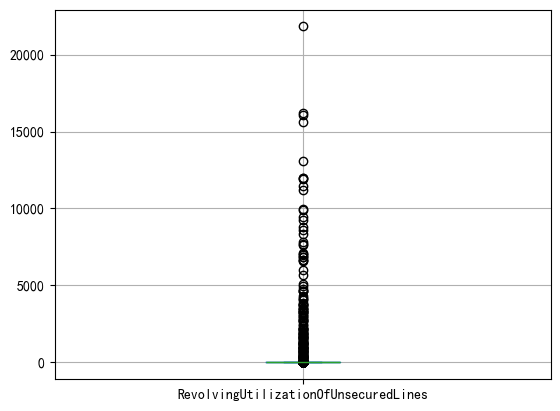

In [88]:
ScoreData["RevolvingUtilizationOfUnsecuredLines"].plot(kind="box", grid=True)

<Axes: >

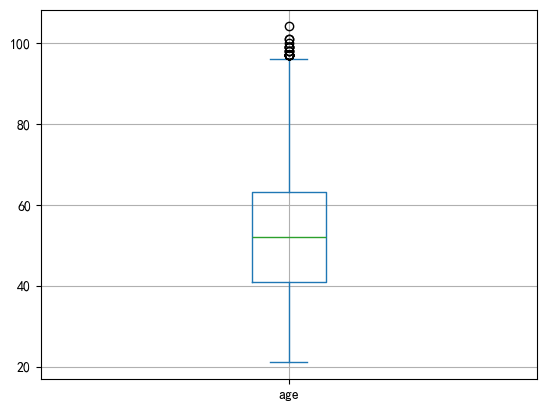

In [89]:
ScoreData.age.plot.box(grid=True)

<Axes: >

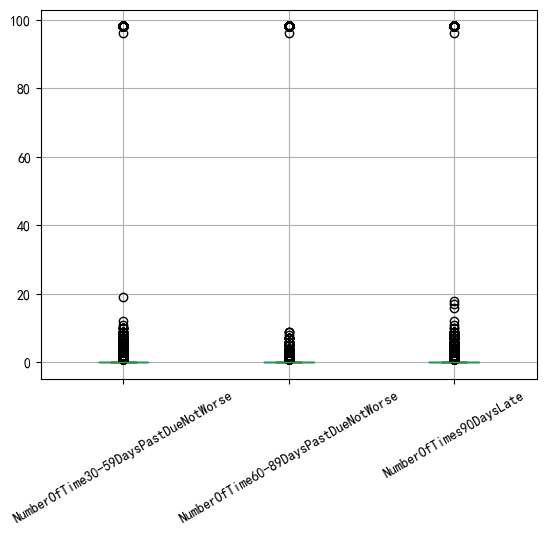

In [90]:
ScoreData.boxplot(column=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"], 
            rot=30)

<Axes: >

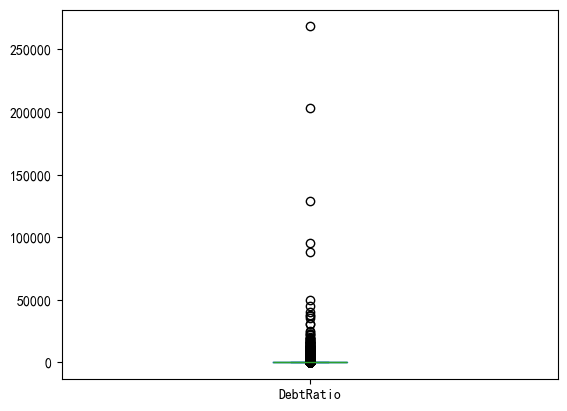

In [91]:
ScoreData["DebtRatio"].plot(kind="box")

<Axes: >

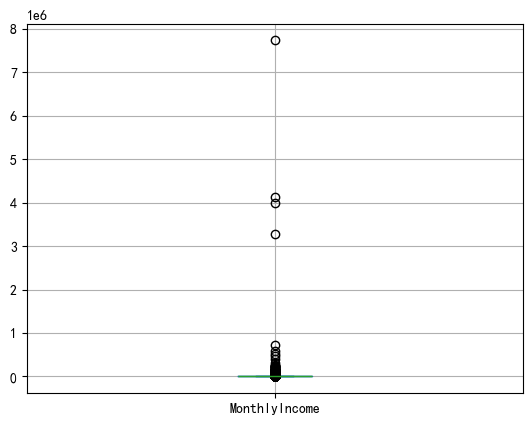

In [92]:
ScoreData.MonthlyIncome.plot.box(grid=True)

<Axes: >

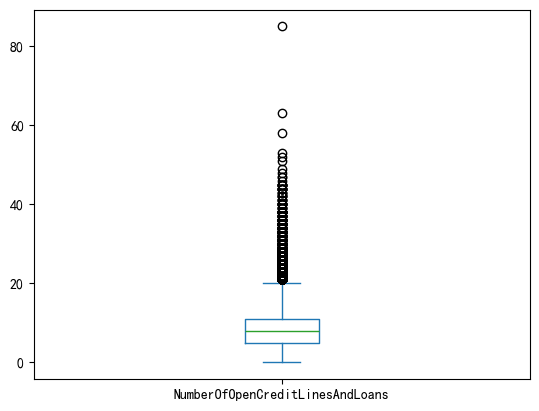

In [93]:
ScoreData["NumberOfOpenCreditLinesAndLoans"].plot(kind="box")

<Axes: >

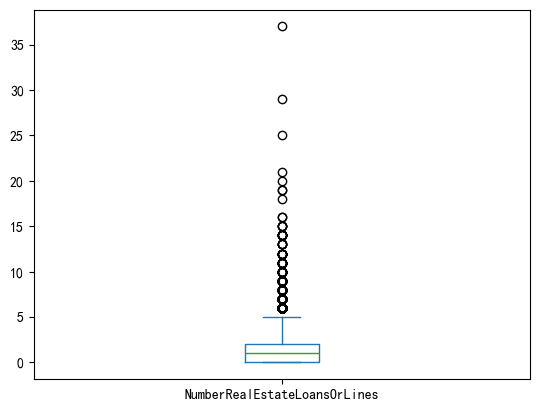

In [94]:
ScoreData["NumberRealEstateLoansOrLines"].plot(kind="box")

<Axes: >

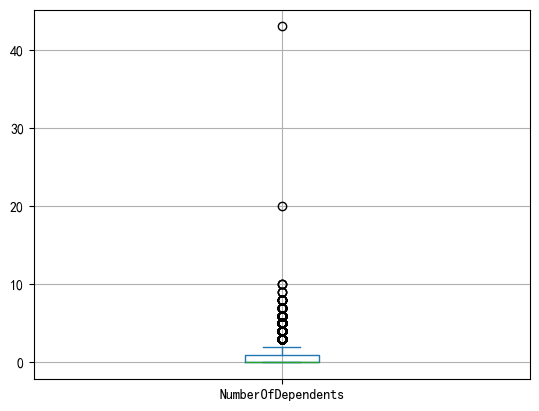

In [96]:
ScoreData.NumberOfDependents.plot.box(grid=True)

In [97]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 用随机森林对缺失值预测填充函数
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 用随机森林对缺失值进行预测填充的函数
def _set_missing(df: pd.DataFrame):  
    # 需要填充的列名
    cols_to_fill = ['MonthlyIncome', 'NumberOfDependents']
    
    # 循环遍历每个需要填充的列
    for col in cols_to_fill:
        # 保留数值型特征，去除第0列并且当前填充的列不作为特征
        feature_cols = [col for col in df.columns if col != 'MonthlyIncome' and col != 'NumberOfDependents']
        process_df = df.loc[:, feature_cols + [col]]
        
        # 分成已知该特征和未知该特征两部分
        known = process_df[process_df[col].notnull()].values
        unknown = process_df[process_df[col].isnull()].values
        
        if len(unknown) == 0:
            continue  # 如果没有缺失值就跳过
        # X为特征属性值，去掉要填充的那一列
        X = known[:, :-1]
        # y为结果标签值，即要填充的列
        y = known[:, -1]
        
        # fit到RandomForestRegressor之中
        rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
        rfr.fit(X, y)
        
        # 用得到的模型进行未知特征值预测
        predicted = rfr.predict(unknown[:, :-1]).round(0)
        print(f"预测值（{col}）：", predicted)
        
        # 用得到的预测结果填补原缺失数据
        df.loc[df[col].isnull(), col] = predicted
    
    return df



In [98]:
ScoreData[ScoreData.SeriousDlqin2yrs == 0].head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [99]:
# 数据处理
ScoreData = _set_missing(ScoreData) # 使用随机森林处理缺失值
# 使用2来代替大于2的值
revNew = []
for val in ScoreData.RevolvingUtilizationOfUnsecuredLines:
    if val <= 2:
        revNew.append(val)
    else:
        revNew.append(2.)
ScoreData.RevolvingUtilizationOfUnsecuredLines = revNew

ScoreData["NumberOfTime30-59DaysPastDueNotWorse"] = replaceOutlier(ScoreData["NumberOfTime30-59DaysPastDueNotWorse"])
ScoreData["NumberOfTime60-89DaysPastDueNotWorse"] = replaceOutlier(ScoreData["NumberOfTime60-89DaysPastDueNotWorse"])
ScoreData["NumberOfTimes90DaysLate"] = replaceOutlier(ScoreData["NumberOfTimes90DaysLate"])


minUpperBound = min([val for (val, out) in zip(ScoreData.DebtRatio, mad_based_outlier(ScoreData.DebtRatio.values)) if out == True])
newDebtRatio = []
for val in ScoreData.DebtRatio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)
ScoreData.DebtRatio = newDebtRatio


minUpperBound_MonthlyIncome = min(
    [val for (val, out) in zip(ScoreData.MonthlyIncome, mad_based_outlier(ScoreData.MonthlyIncome.values)) if out == True])
newMonthlyIncome = []
for val in ScoreData.MonthlyIncome:
    if val > minUpperBound_MonthlyIncome:
        newMonthlyIncome.append(minUpperBound_MonthlyIncome)
    else:
        newMonthlyIncome.append(val)
ScoreData.MonthlyIncome = newMonthlyIncome

minUpperBound_NumberOfOpenCreditLinesAndLoans = min([val for (val, out) in zip(df.NumberOfOpenCreditLinesAndLoans,
                                                                               mad_based_outlier(
                                                                                   df.NumberOfOpenCreditLinesAndLoans.values))                                                if out == True])


newNumberOfOpenCreditLinesAndLoans = []
for val in ScoreData.NumberOfOpenCreditLinesAndLoans:
    if val > minUpperBound_NumberOfOpenCreditLinesAndLoans:
        newNumberOfOpenCreditLinesAndLoans.append(minUpperBound_NumberOfOpenCreditLinesAndLoans)
    else:
        newNumberOfOpenCreditLinesAndLoans.append(val)

ScoreData.NumberOfOpenCreditLinesAndLoans = newNumberOfOpenCreditLinesAndLoans


realNew = []
for val in ScoreData.NumberRealEstateLoansOrLines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)

ScoreData.NumberRealEstateLoansOrLines = realNew


depNew = []
for var in ScoreData.NumberOfDependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

ScoreData.NumberOfDependents = depNew




预测值（MonthlyIncome）： [3256. 1780. 8351. ... 1780. 1780. 8351.]
预测值（NumberOfDependents）： [0. 1. 1. ... 0. 0. 0.]


In [100]:

# 确保新数据的特征与模型训练时保持一致
X_new = ScoreData.drop(['SeriousDlqin2yrs'], axis=1)
X_new.info()
# X_new = sm.add_constant(X_new)  # 如果需要常数列

# 3. 使用模型进行预测
# 使用最优的模型，假设是 bestGbModFitted 或 bestAdaModFitted
# 获取概率预测 (如果需要 AUC、ROC 曲线，可以使用概率预测)
predictions_proba = bestGbModFitted.predict_proba(X_new)

# 如果你只需要分类预测
predictions = bestGbModFitted.predict(X_new)

# 4. 保存预测结果
# 将预测结果添加到原数据中
ScoreData['Predicted_Probability'] = predictions_proba[:, 1]  # 假设我们只需要正类的概率
ScoreData['SeriousDlqin2yrs'] = predictions  # 分类预测结果

# 保存结果到 CSV
ScoreData.to_csv('predicted_results.csv', index=False)

print("预测已完成，并保存到 'predicted_results.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 1   age                                   101503 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  float64
 3   DebtRatio                             101503 non-null  float64
 4   MonthlyIncome                         101503 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 6   NumberOfTimes90DaysLate               101503 non-null  float64
 7   NumberRealEstateLoansOrLines          101503 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  float64
 9   NumberOfDependents                    101503 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 7.7 MB


NameError: name 'bestGbModFitted' is not defined